Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

# AIM #1: Generate a very large dataset

# 1. 使用 Pandas 生成一百万个随机数据项
start_time_pandas = time.time()
pandas_data = pd.Series(np.random.randint(1, 101, size=1_000_000))
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 2. 使用 NumPy 生成一百万个随机数据项
start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1_000_000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 3. 输出时间和比较
print(f"Pandas生成数据的时间: {pandas_time:.6f}秒")
print(f"NumPy生成数据的时间: {numpy_time:.6f}秒")

if pandas_time < numpy_time:
    print("Pandas更快。")
else:
    print("NumPy更快。")


Pandas生成数据的时间: 0.017174秒
NumPy生成数据的时间: 0.007106秒
NumPy更快。


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [7]:
import pandas as pd
import numpy as np
import time

# 加载数据集（请更新为你的实际文件路径）
start_time_pandas = time.time()
df = pd.read_csv('D:/Github/No-Grade-Exercise6/sleep_health.csv')
print("DataFrame 列名:\n", df.columns) 

# 步骤 1：使用 pandas 计算均值
mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas 均值:\n", mean_values)

# 步骤 2：使用 NumPy 计算均值
data_np = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].to_numpy()
mean_values_np = np.mean(data_np, axis=0)
print("NumPy 均值:\n", mean_values_np)

# 步骤 3：使用 pandas 计算相关性
correlation_matrix = df.corr()
sleep_duration_age = df['Sleep Duration'].corr(df['Age'])
sleep_duration_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
sleep_duration_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])
print(f"相关性 (Pandas) - 睡眠时长与年龄: {sleep_duration_age}")
print(f"相关性 (Pandas) - 睡眠时长与心率: {sleep_duration_heart_rate}")
print(f"相关性 (Pandas) - 睡眠时长与每日步数: {sleep_duration_daily_steps}")

# 步骤 4：使用 NumPy 计算相关性
age_np = df['Age'].to_numpy()
sleep_duration_np = df['Sleep Duration'].to_numpy()
heart_rate_np = df['Heart Rate'].to_numpy()
daily_steps_np = df['Daily Steps'].to_numpy()
correlation_sleep_age_np = np.corrcoef(sleep_duration_np, age_np)[0, 1]
correlation_sleep_heart_rate_np = np.corrcoef(sleep_duration_np, heart_rate_np)[0, 1]
correlation_sleep_daily_steps_np = np.corrcoef(sleep_duration_np, daily_steps_np)[0, 1]
print(f"相关性 (NumPy) - 睡眠时长与年龄: {correlation_sleep_age_np}")
print(f"相关性 (NumPy) - 睡眠时长与心率: {correlation_sleep_heart_rate_np}")
print(f"相关性 (NumPy) - 睡眠时长与每日步数: {correlation_sleep_daily_steps_np}")

# 步骤 5：使用 pandas 计算标准差
std_sleep_duration = df['Sleep Duration'].std()
print(f"标准差 (Pandas) 睡眠时长: {std_sleep_duration}")

# 步骤 6：使用 NumPy 计算标准差
std_sleep_duration_np = np.std(sleep_duration_np, ddof=1)
print(f"标准差 (NumPy) 睡眠时长: {std_sleep_duration_np}")

# 测量时间
end_time_pandas = time.time()
print(f"使用 Pandas 所需时间: {end_time_pandas - start_time_pandas} 秒")

# 使用 NumPy
start_time_numpy = time.time()
# 这里可以重复上面的 NumPy 计算
end_time_numpy = time.time()

# 最终时间比较
print(f"使用 NumPy 所需时间: {end_time_numpy - start_time_numpy} 秒")


DataFrame 列名:
 Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')
Pandas 均值:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy 均值:
 [   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
相关性 (Pandas) - 睡眠时长与年龄: 0.3447093581647441
相关性 (Pandas) - 睡眠时长与心率: -0.5164548885171423
相关性 (Pandas) - 睡眠时长与每日步数: -0.03953253767573161
相关性 (NumPy) - 睡眠时长与年龄: 0.3447093581647441
相关性 (NumPy) - 睡眠时长与心率: -0.5164548885171423
相关性 (NumPy) - 睡眠时长与每日步数: -0.03953253767573161
标准差 (Pandas) 睡眠时长: 0.7956567308898189
标准差 (NumPy) 睡眠时长: 0.7956567308898189
使用 Pandas 所需时间: 0.007092475891113281 秒
使用

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

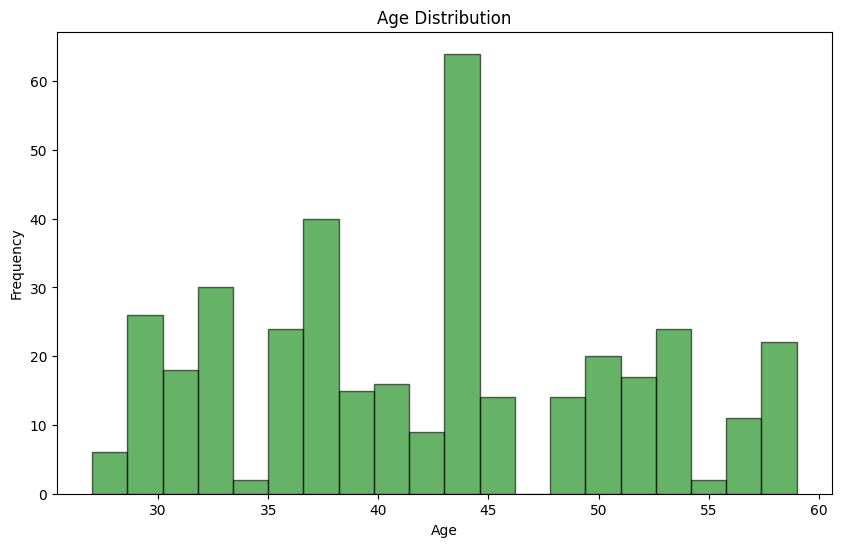

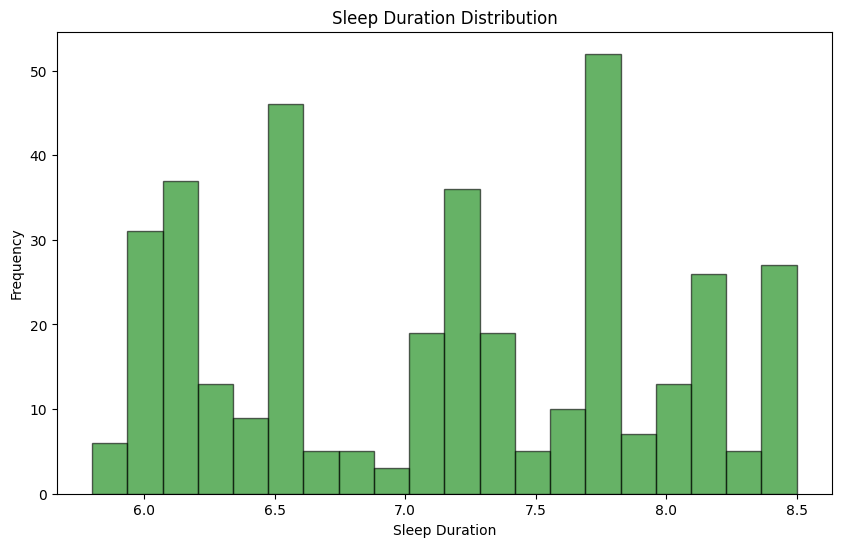

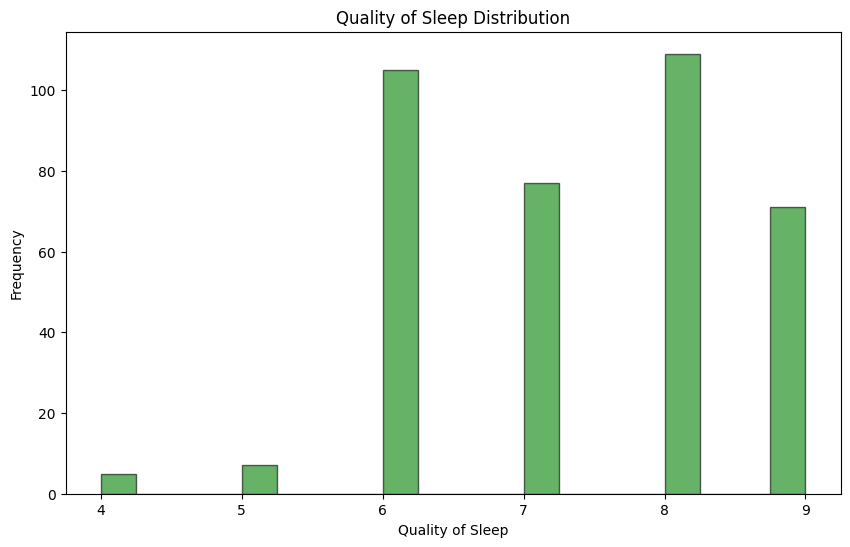

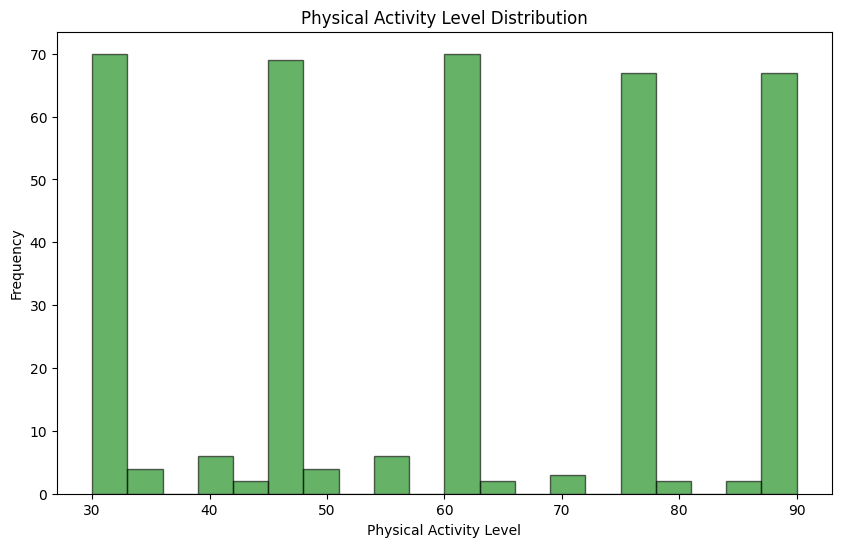

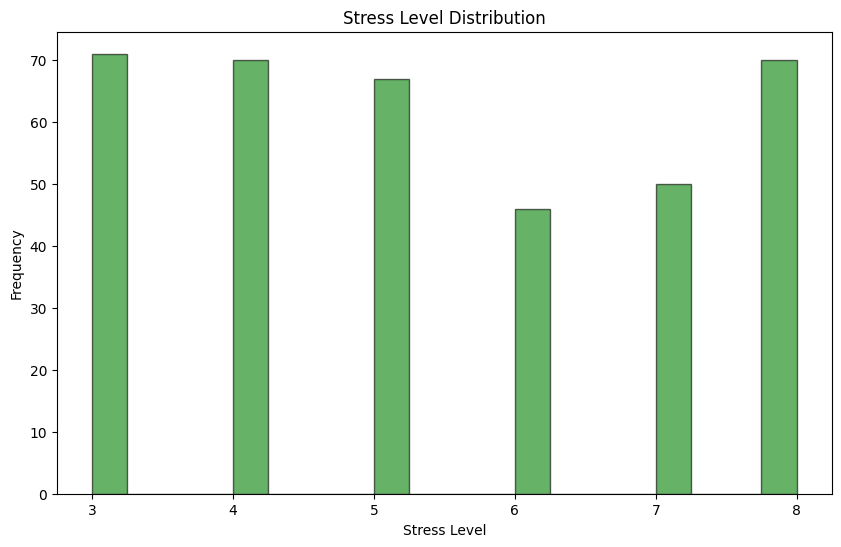

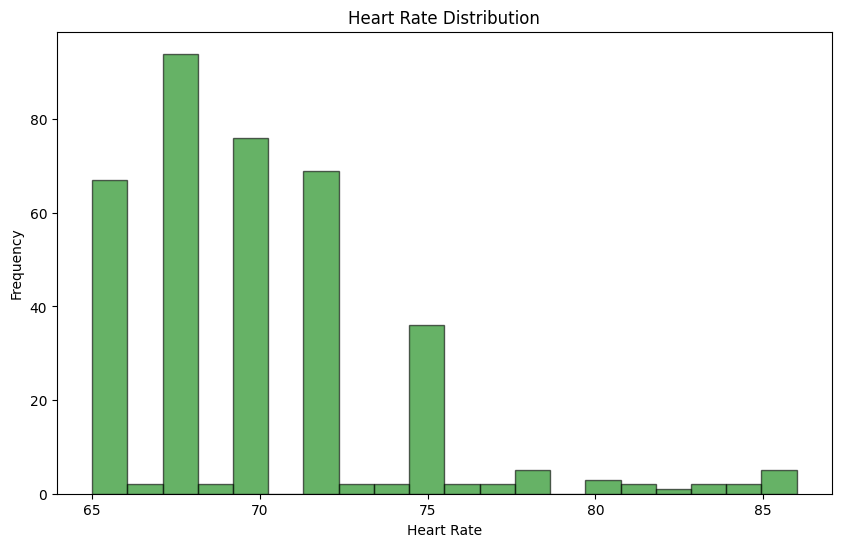

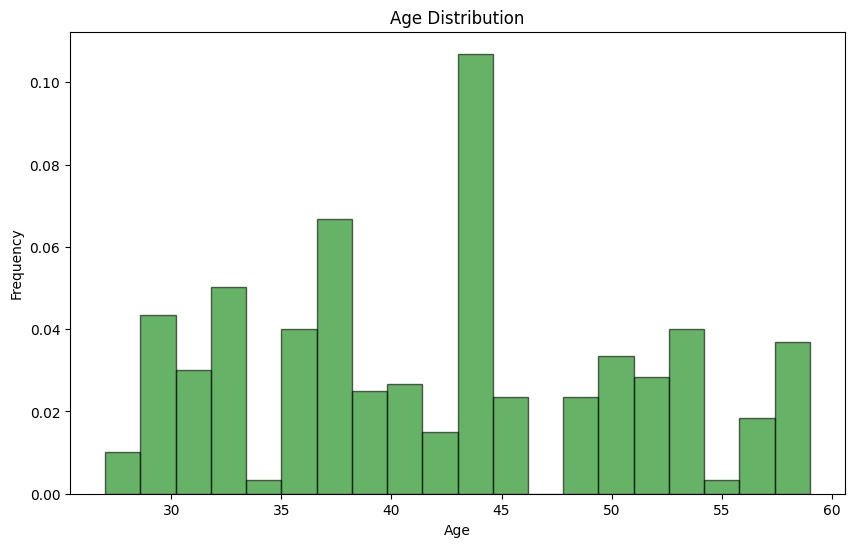

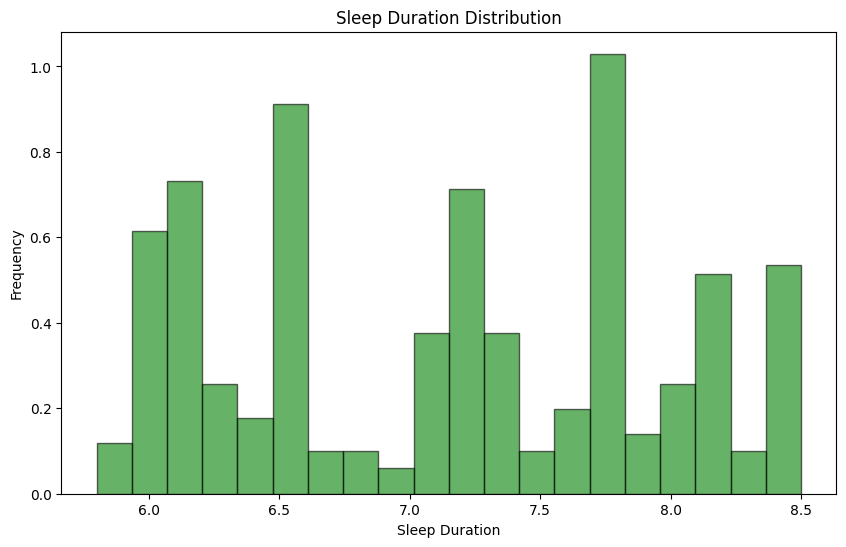

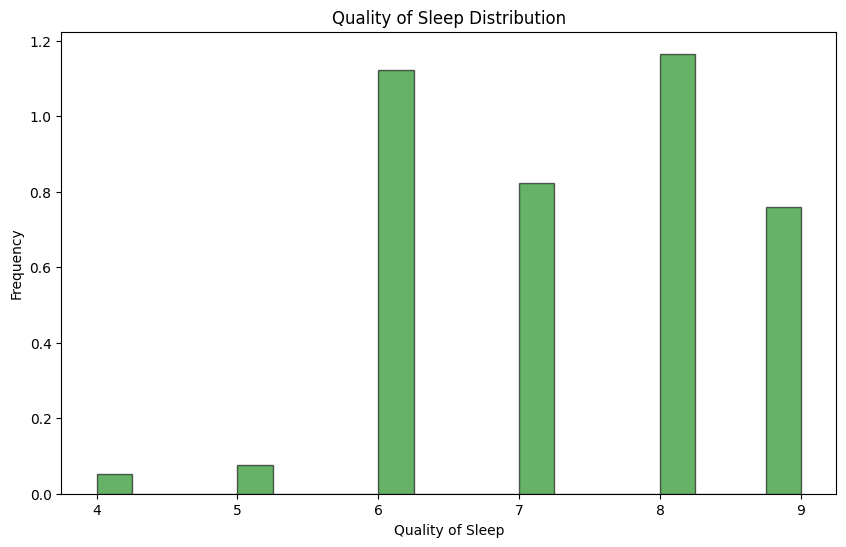

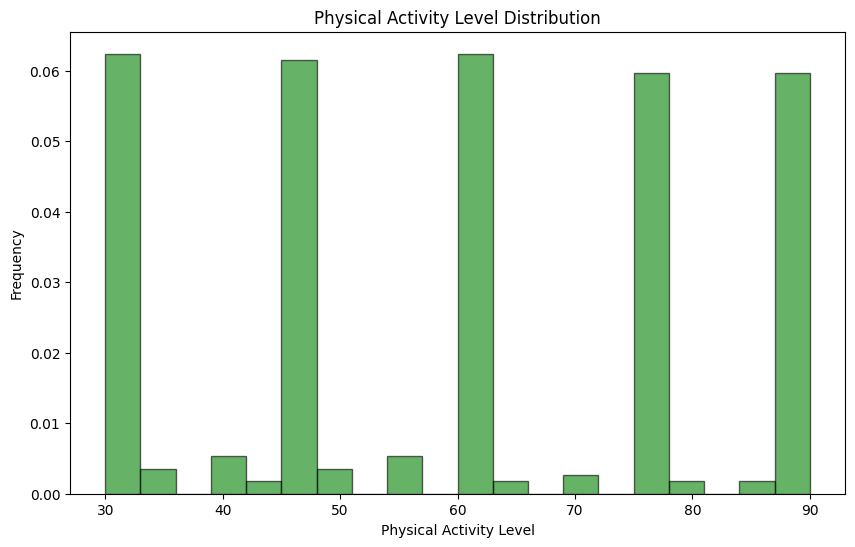

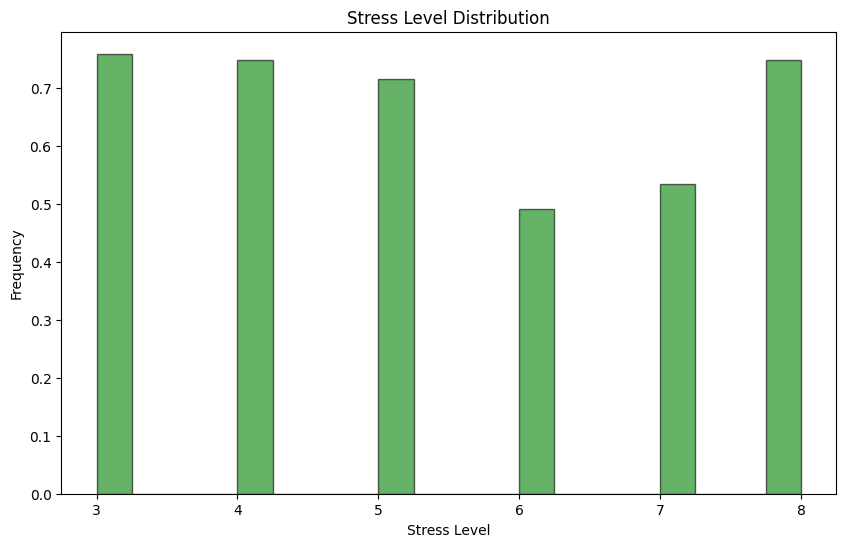

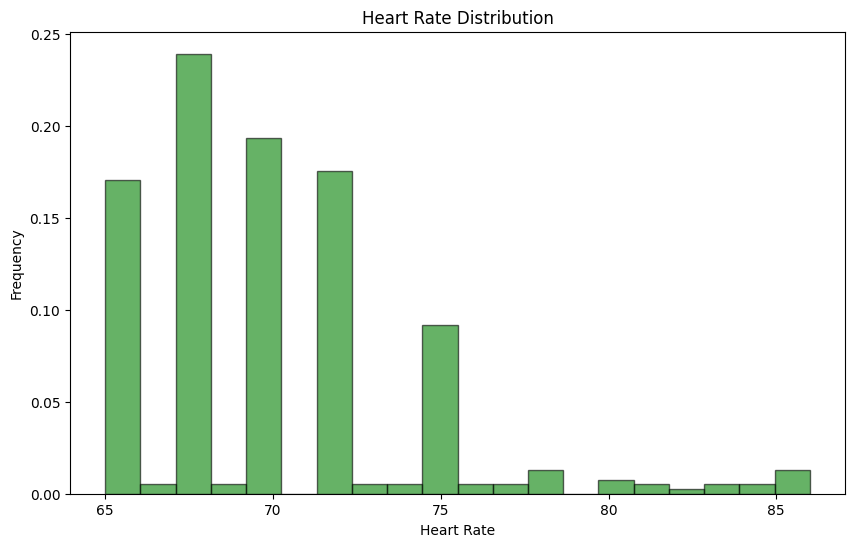

Pandas 绘图时间: 0.55秒
NumPy 绘图时间: 0.66秒


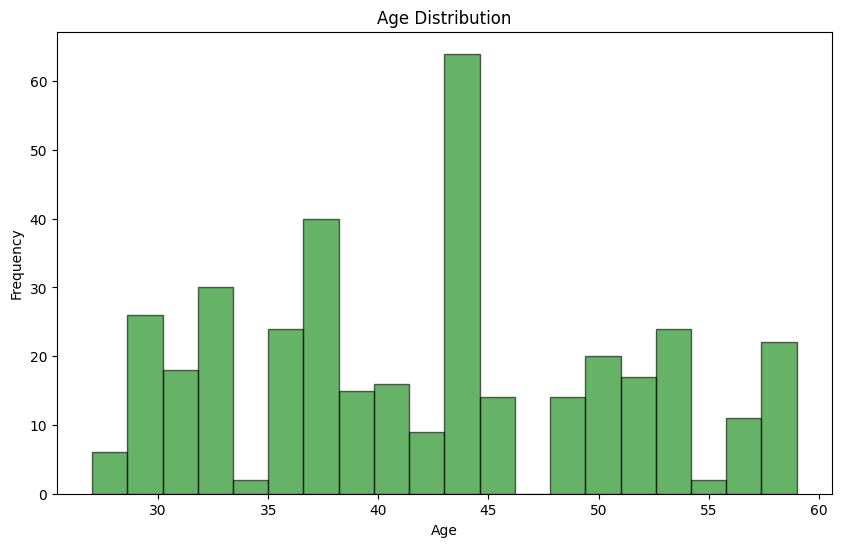

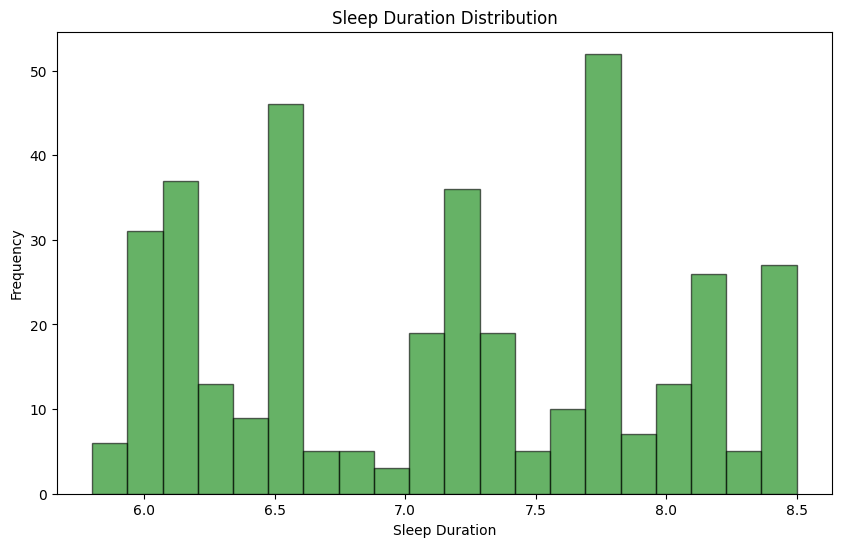

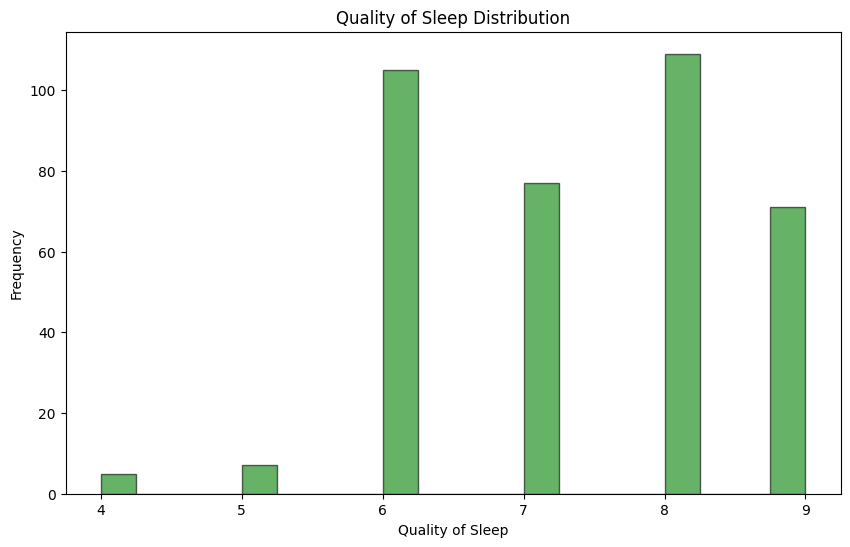

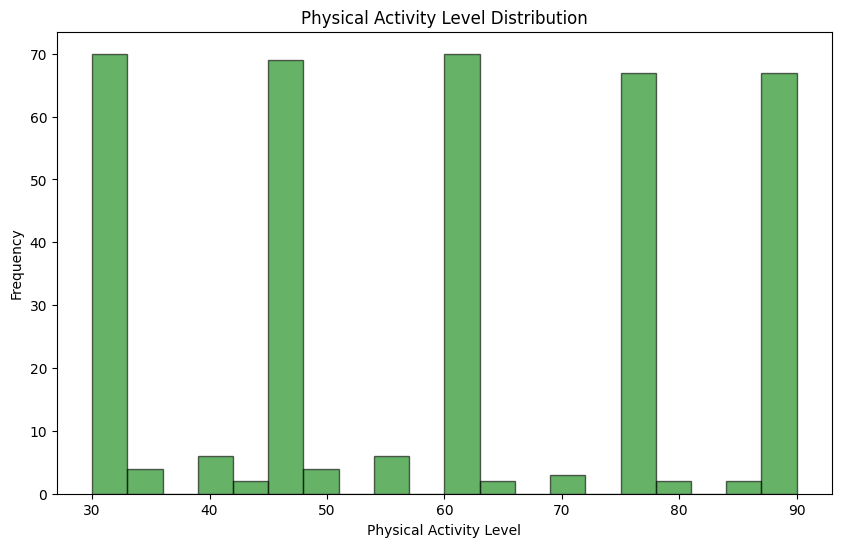

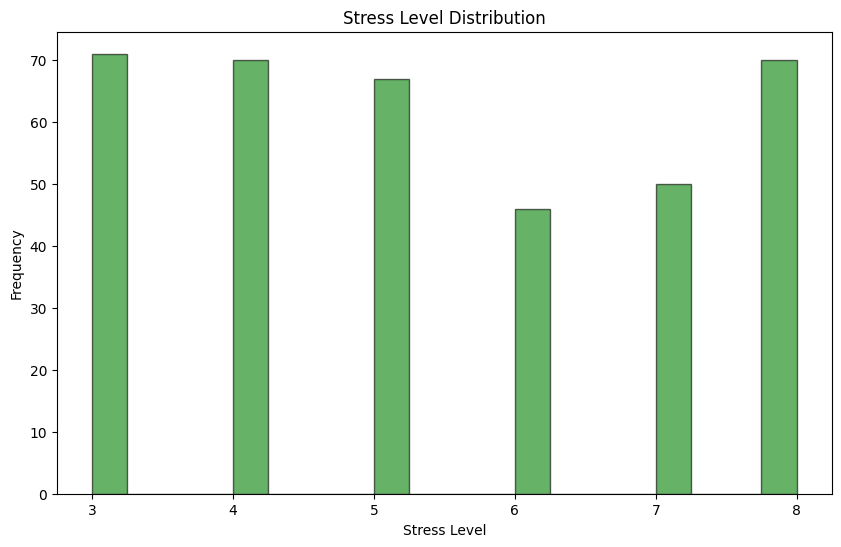

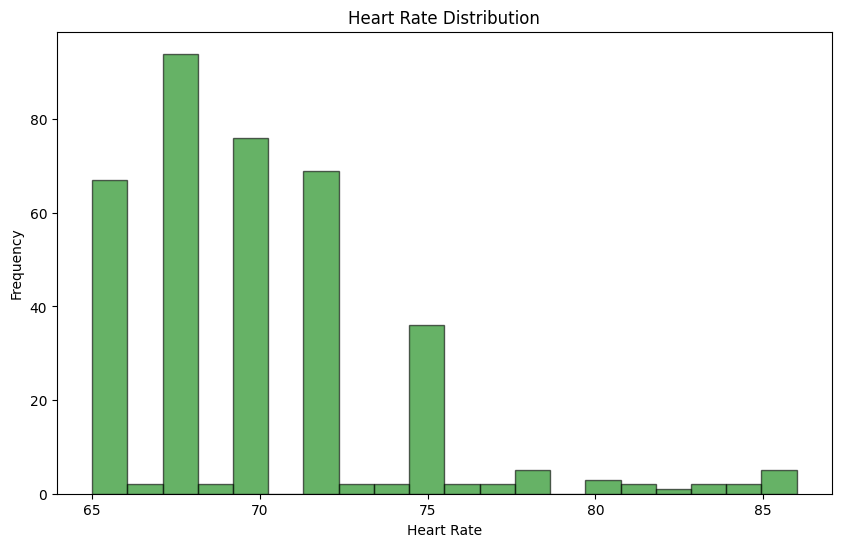

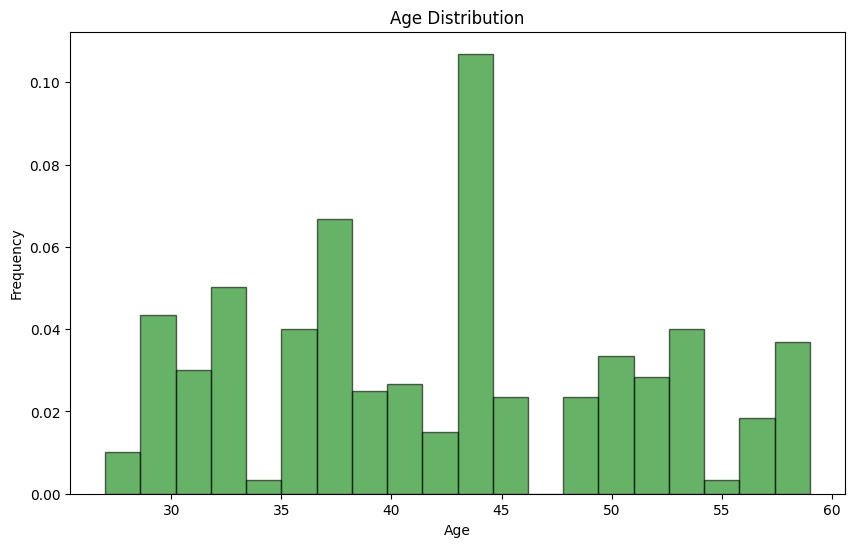

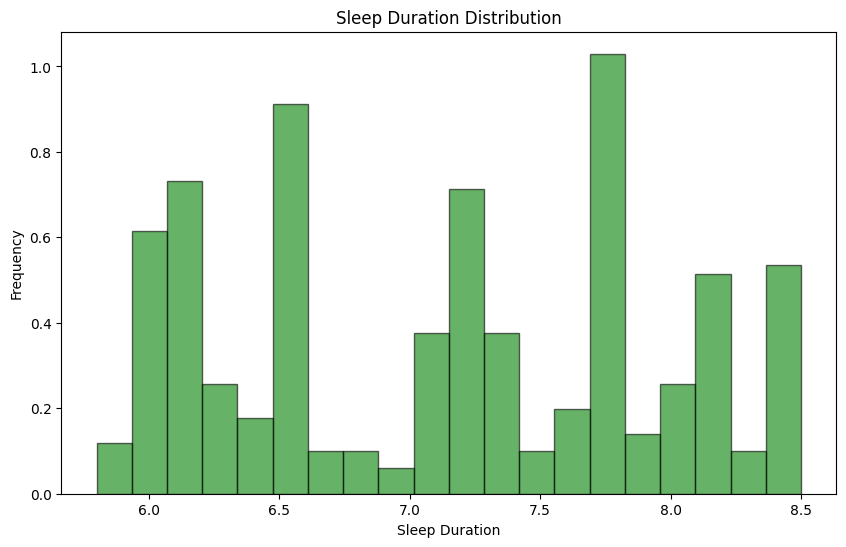

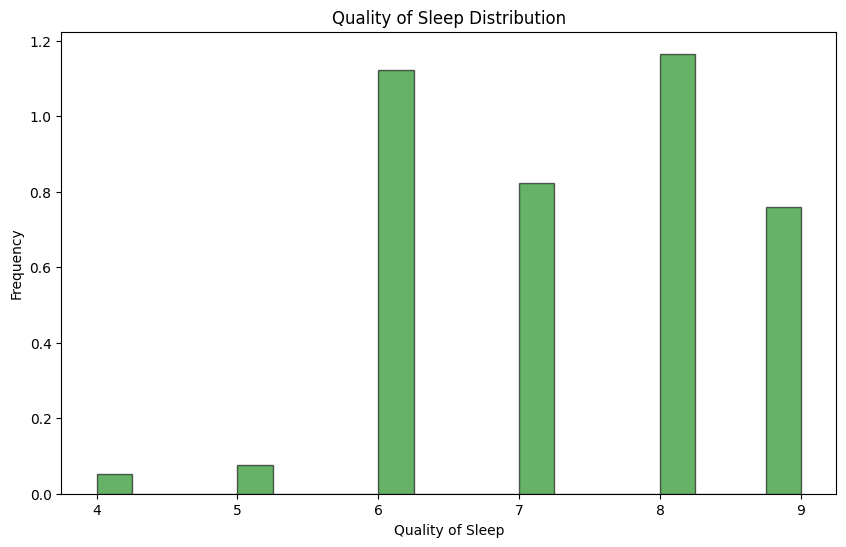

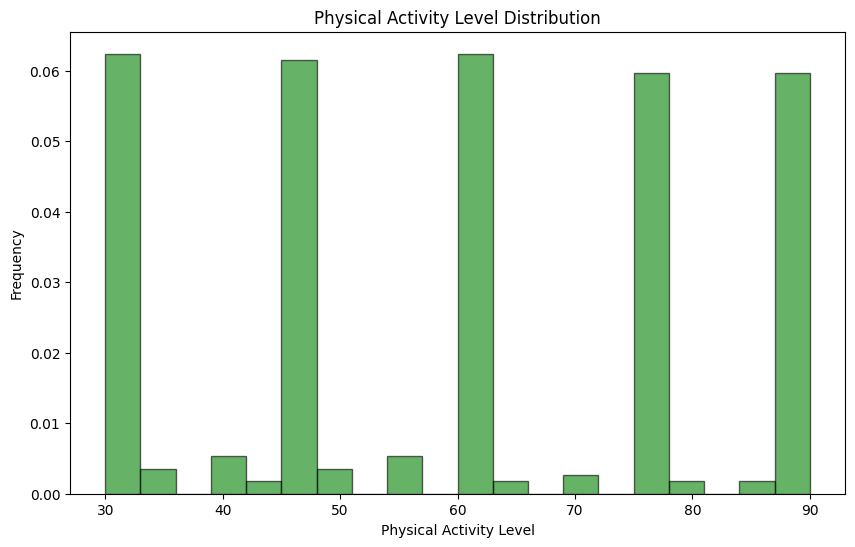

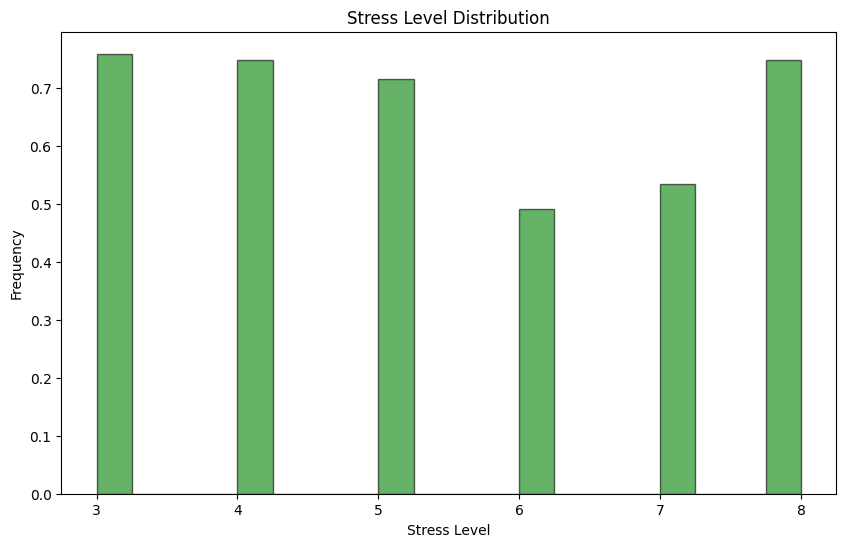

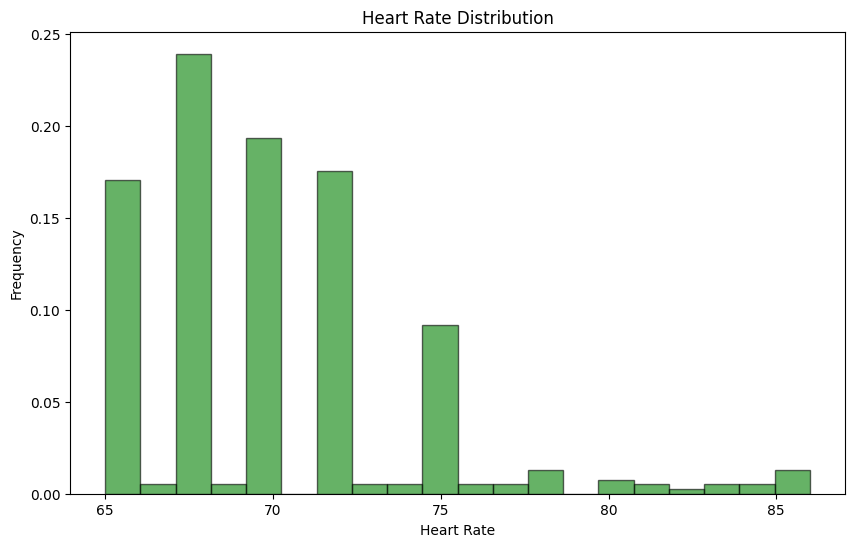

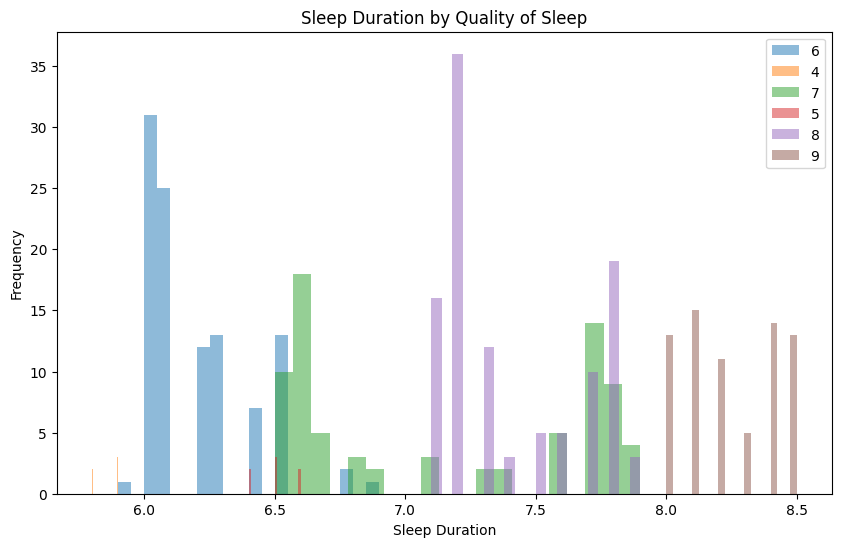

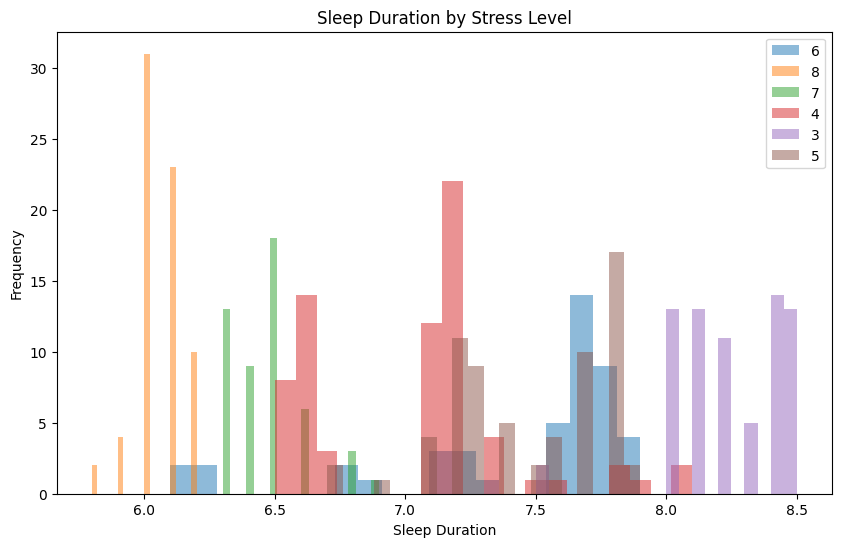

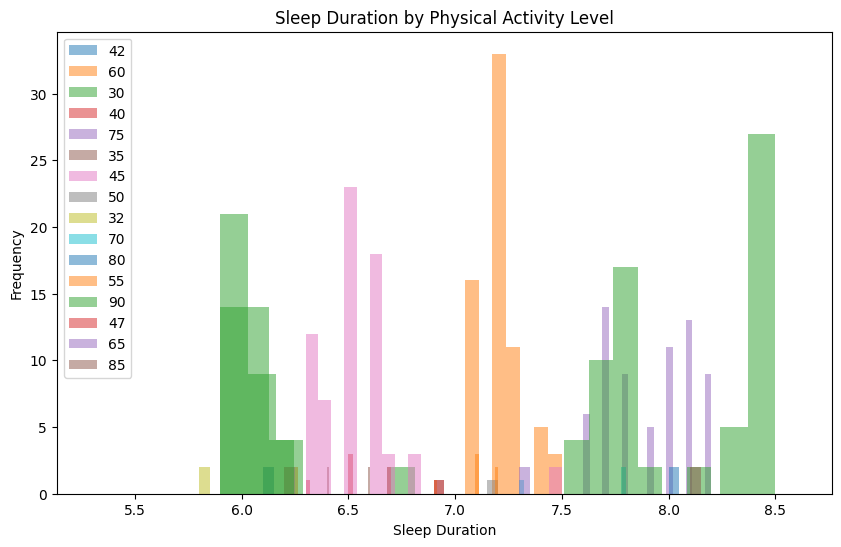

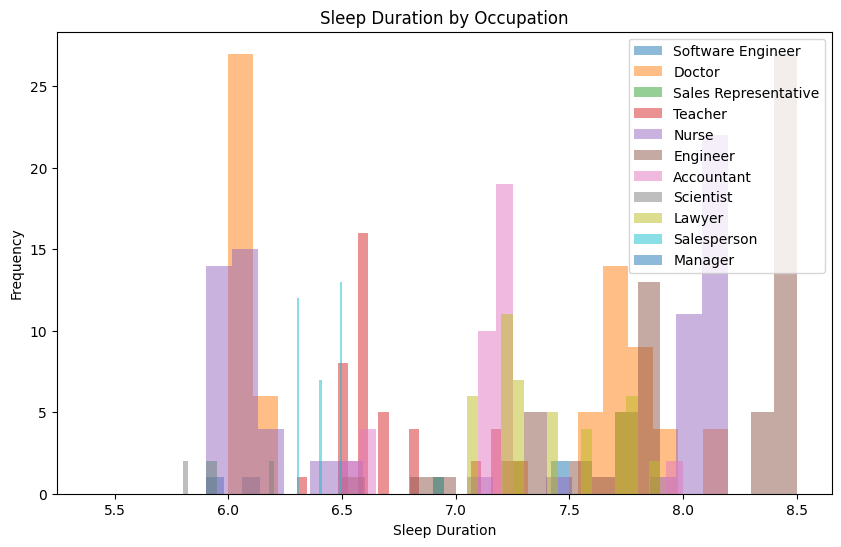

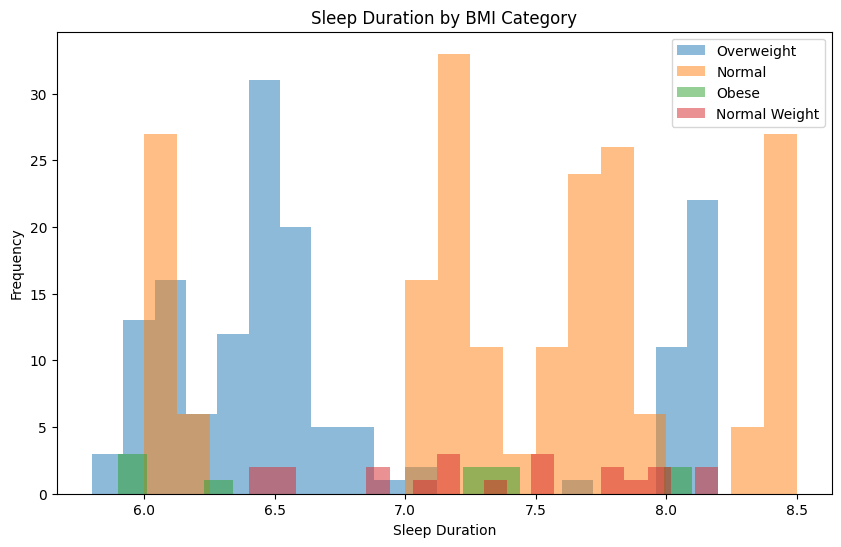

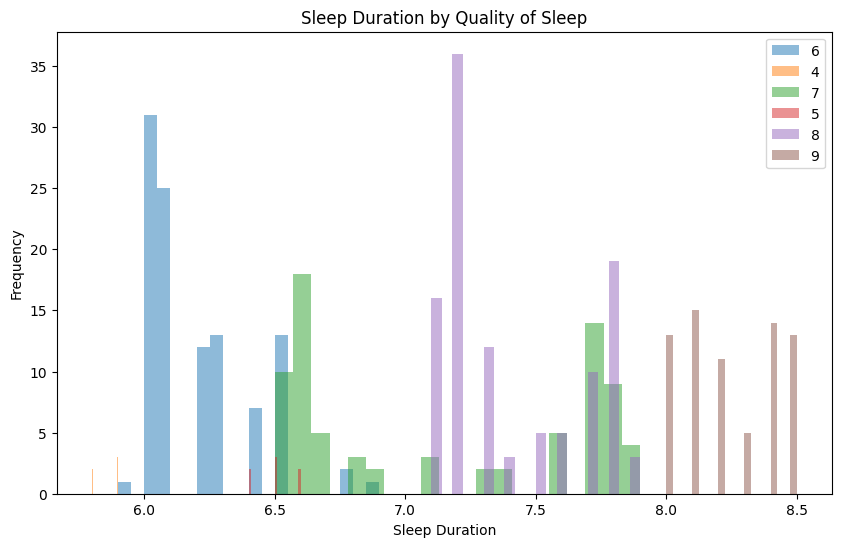

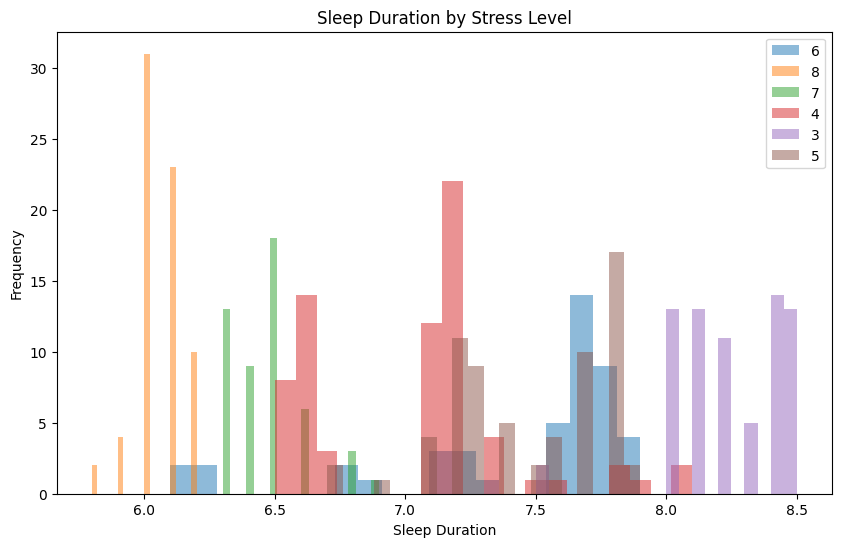

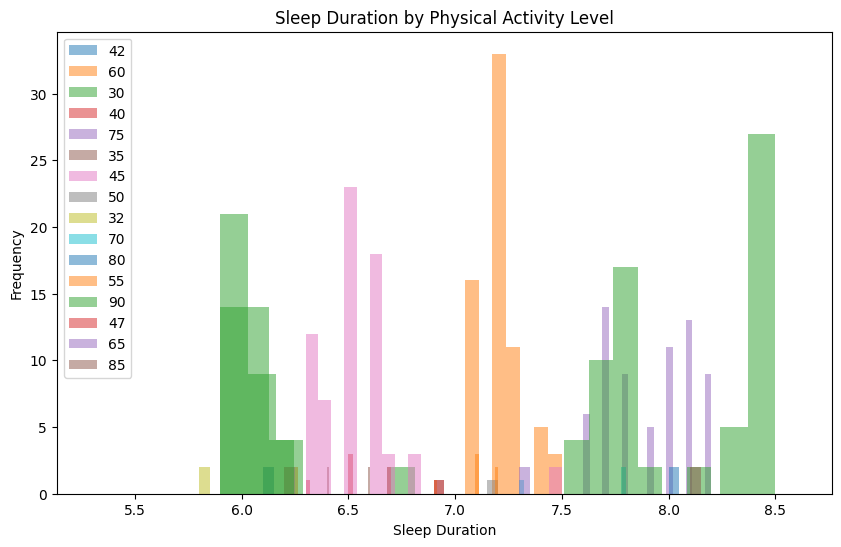

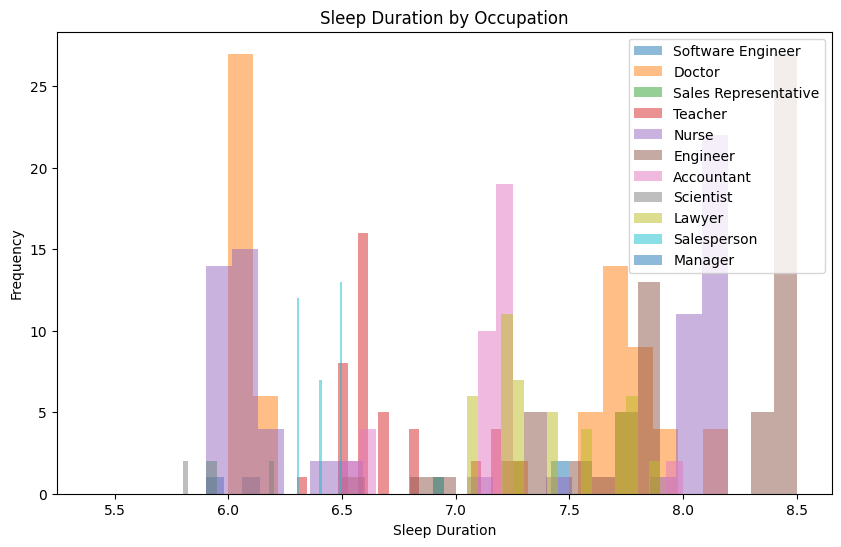

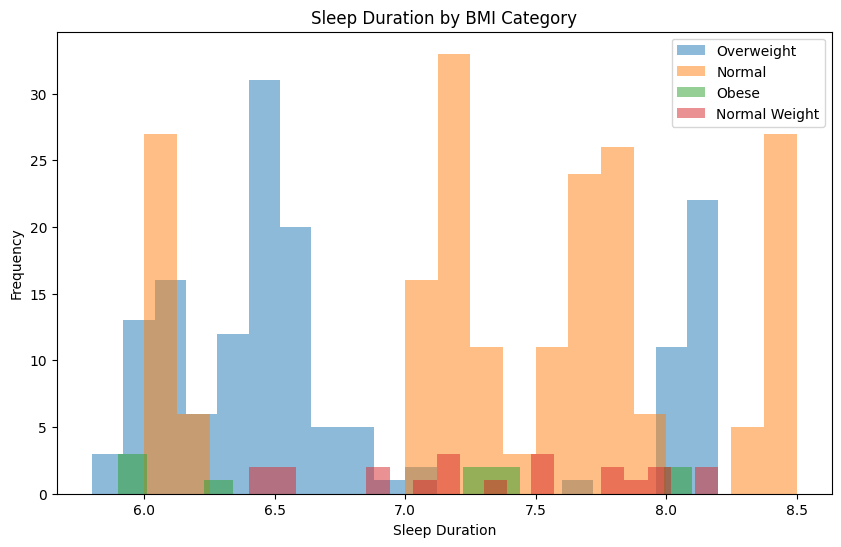

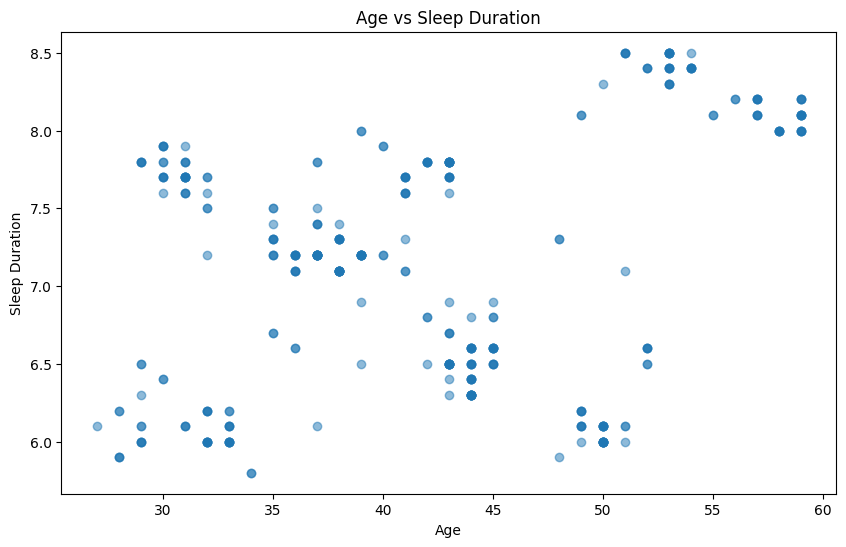

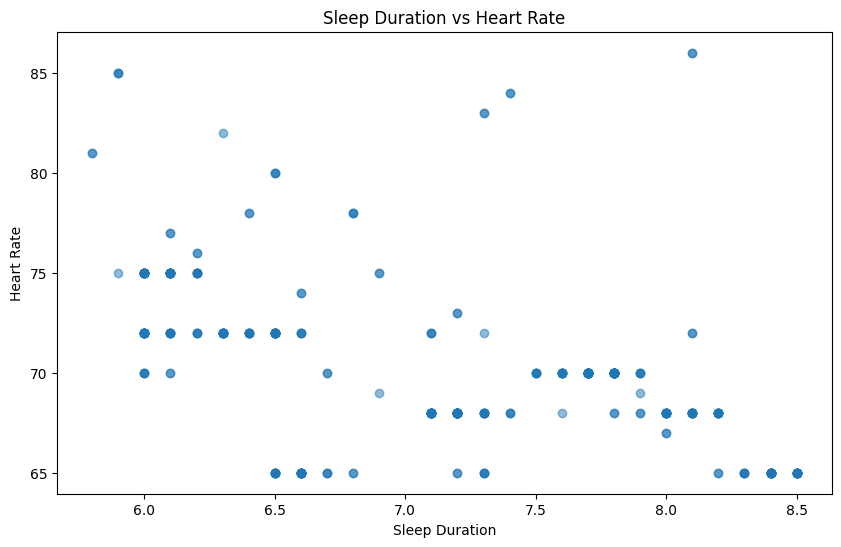

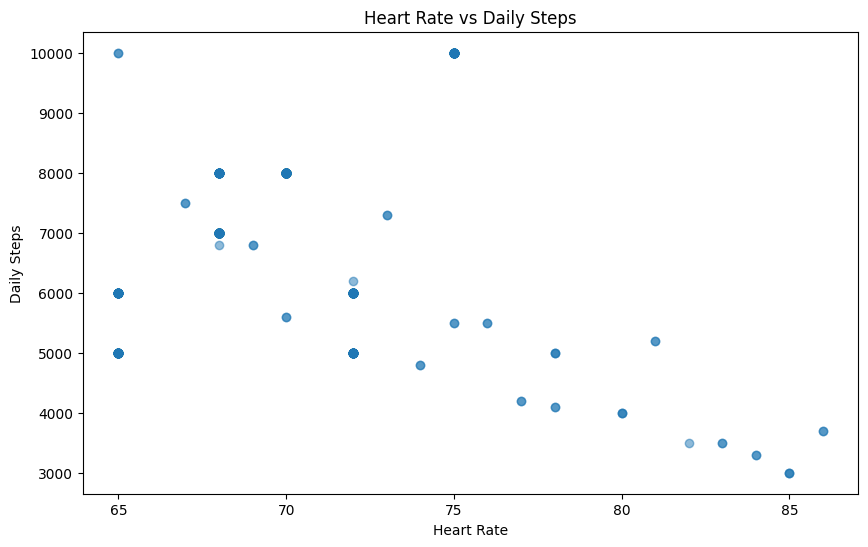

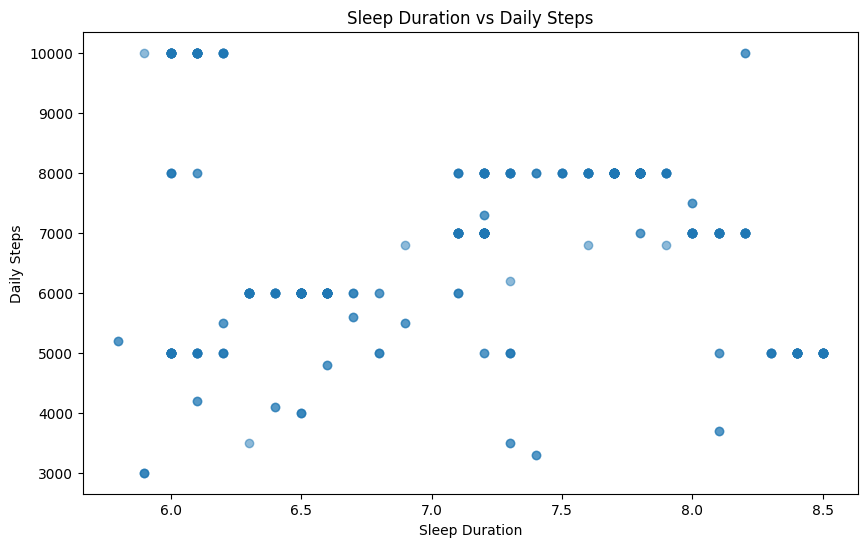

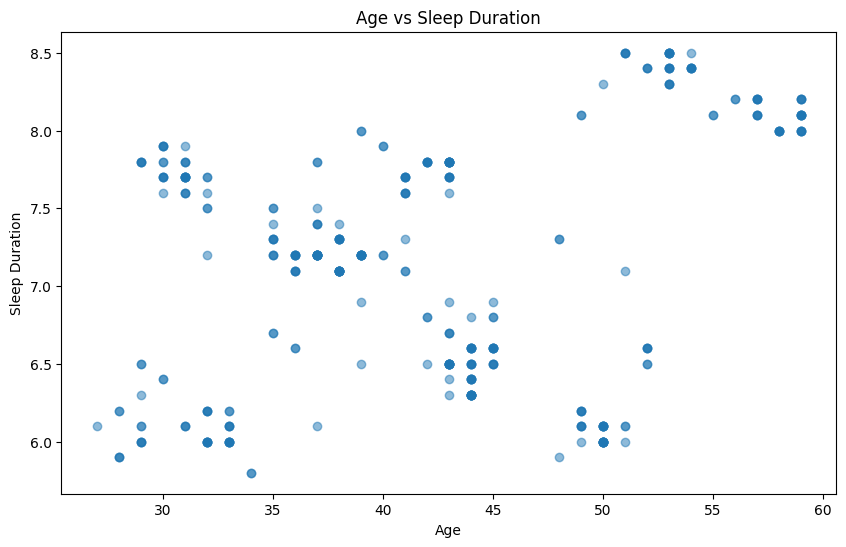

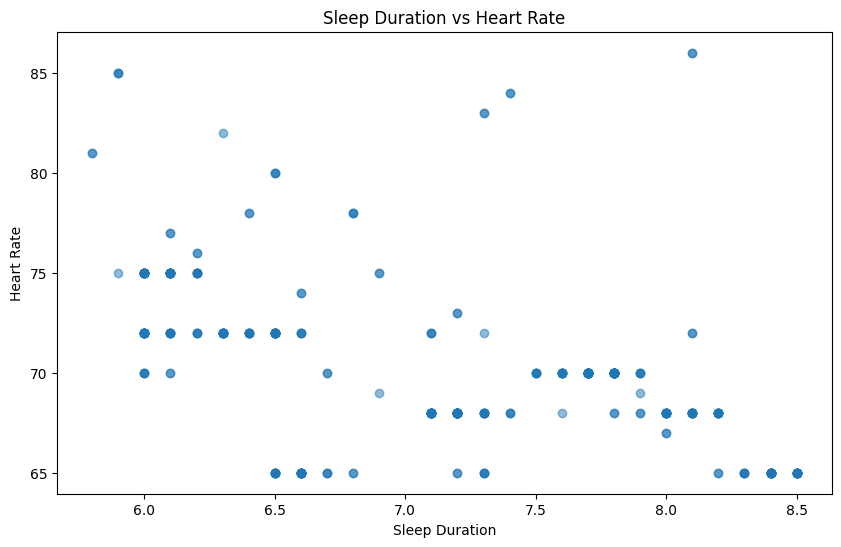

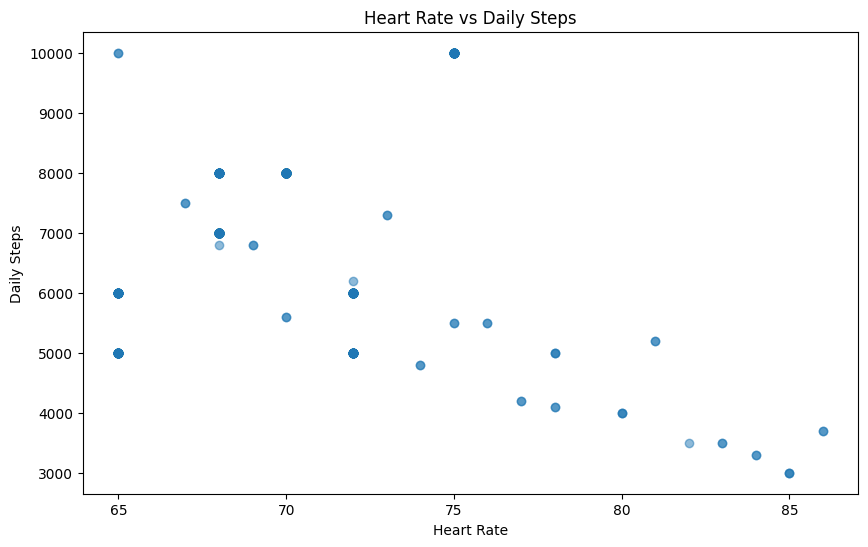

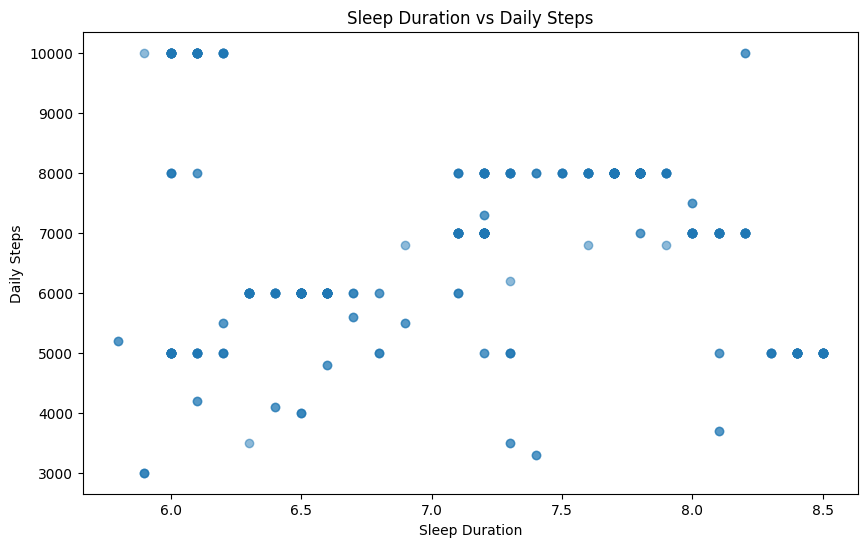

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# 读取数据
df = pd.read_csv('D:/Github/No-Grade-Exercise6/sleep_health.csv')

# 1. 使用 Pandas 绘制分布图
def plot_distribution_pandas():
    features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.hist(df[feature], bins=20, alpha=0.6, color='g', edgecolor='black')
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# 2. 使用 NumPy 和 Matplotlib 绘制分布图
def plot_distribution_numpy():
    features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.hist(np.array(df[feature]), bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# 3. 使用 Pandas 查看不同条件下的“睡眠时长”分布
def plot_sleep_duration_by_conditions():
    conditions = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']
    for condition in conditions:
        plt.figure(figsize=(10, 6))
        for value in df[condition].unique():
            plt.hist(df[df[condition] == value]['Sleep Duration'], bins=20, alpha=0.5, label=str(value))
        plt.title(f'Sleep Duration by {condition}')
        plt.xlabel('Sleep Duration')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# 4. 使用 NumPy 查看不同条件下的“睡眠时长”分布
def plot_sleep_duration_by_conditions_numpy():
    conditions = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']
    for condition in conditions:
        plt.figure(figsize=(10, 6))
        for value in df[condition].unique():
            plt.hist(df[df[condition] == value]['Sleep Duration'], bins=20, alpha=0.5, label=str(value))
        plt.title(f'Sleep Duration by {condition}')
        plt.xlabel('Sleep Duration')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# 5. 使用 Pandas 查看不同因素之间的关系
def plot_relationships_pandas():
    relationships = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'),
                     ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]
    for x, y in relationships:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[x], df[y], alpha=0.5)
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

# 6. 使用 NumPy 查看不同因素之间的关系
def plot_relationships_numpy():
    relationships = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'),
                     ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]
    for x, y in relationships:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[x], df[y], alpha=0.5)
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

# 7. 比较使用 Pandas 和 NumPy 绘图的时间差异
def compare_plotting_time():
    start_pandas = time.time()
    plot_distribution_pandas()
    end_pandas = time.time()

    start_numpy = time.time()
    plot_distribution_numpy()
    end_numpy = time.time()

    print(f"Pandas 绘图时间: {end_pandas - start_pandas:.2f}秒")
    print(f"NumPy 绘图时间: {end_numpy - start_numpy:.2f}秒")

# 执行所有绘图函数
compare_plotting_time()
plot_distribution_pandas()
plot_distribution_numpy()
plot_sleep_duration_by_conditions()
plot_sleep_duration_by_conditions_numpy()
plot_relationships_pandas()
plot_relationships_numpy()


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

